In [49]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score)

digits = datasets.load_digits()
y = digits.target
images = digits.images

n_samples = len(images)
X = images.reshape([n_samples, -1])

df = pd.DataFrame(X)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [52]:
"""
    Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42. 
    Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.
    Použij klasifikátor SVC a jako kernel použij linear. Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. 
    Nenastavuj ani žádné další parametry.
    Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, 
    které pojmenuj y_pred.
    Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.
"""

'\n    Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42. \n    Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.\n    Použij klasifikátor SVC a jako kernel použij linear. Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. \n    Nenastavuj ani žádné další parametry.\n    Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, \n    které pojmenuj y_pred.\n    Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.\n'

In [53]:
accuracy_score(y_test, y_pred)
# 0.9796

0.9796296296296296

BONUS

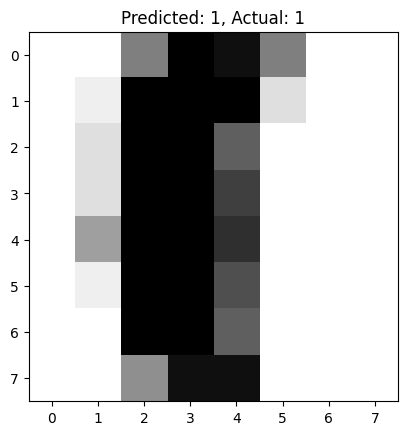

In [55]:
import matplotlib.pyplot as plt

for i in range(0, len(y_pred)):
    # 1 Napiš podmínku, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if y_pred[i] == y[i]:
        image = X_test[i] # 2 sem dej načtení i-tého obrázku z proměnné X_test
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")